IA & Data science (LU3IN0226) -- 2021-2022
--------
*&copy; Equipe pédagogique: Vincent Guigue, Christophe Marsala, Olivier Schwander.*

<font size="+1" color="RED"><b>[Q]</b></font> <font size="+1"><b>Indiquer dans la boîte ci-dessous vos noms et prénoms :</b></font>

- Amayas SADI
- Rayane MAKHLOUF

<b>Ce projet peut être fait en binôme (et c'est fortement conseillé) ou tout seul.</b>
Le nom de chaque membre du binôme doit être indiqué, et un seul rendu sur un des deux comptes Moodle doit être fait.

<b>Les groupes de plus de 2 personnes ne sont pas autorisés.</b>

<font color="RED" size="+1"><b>[Q]</b></font> **Renommer ce fichier ipython**

Tout en haut de cette page, cliquer sur <tt>projet-2</tt> et rajouter à la suite de <tt>projet-2</tt> les noms des membres du binômes séparés par un tiret.

<font color="RED" size="+1">IMPORTANT: soumission de votre fichier final</font>

**Nom à donner au notebook** : *projet-2-Nom1_Nom2.ipynb* 

- Amayas SADI
- Rayane MAKHLOUF

**Le compte-rendu doit être rendu sur la page Moodle.**

# Projet 2 - avril-mai 2022


<font size="+1" color="RED"><b>Date de rendu : lundi 9 mai, 19h au plus tard</b></font>
    
(<b>attention! le site Moodle ferme à 19h pile !</b> prévoyez de vous y connecter au moins 15mn avant la fermeture...)


Vous devez compléter ce notebook en rajoutant vos expérimentations avec vos algorithmes d'apprentissage sur les données Agribalise qui sont des données ouvertes dont la documentation peut être consultée ici : https://doc.agribalyse.fr/documentation/acces-donnees

Très important : les fichiers de données doivent être placés de façon à respecter la structure de fichiers suivante :

          --iads/
              -- Classifiers.py
              -- etc.
          -- projet/
              -- ce_notebook.ipynb
              -- Donnees_Agribalyse/
                  -- detail_ingredient.csv
                  -- detail_etape.csv
                  -- synthese.csv

Dans le notebook, le chargement des fichiers de données considèrera donc cette arborescence.

## Travail à faire

Appliquer les algorithmes d'apprentissage vus tout au long du semestre sur les données afin de mettre en évidence des résultats intéressants.
Deux problèmes, au moins, doivent être traités:
- un problème d'apprentissage supervisé
- un problème d'apprentissage non supervisé


## Travail à rendre
Ce qui doit être remis avant la date limite : un fichier archive (`.tar`, `.tgz`, ou `.zip` uniquement) contenant:
- ce notebook complété. Il doit pouvoir être exécuté sans autre apport (pensez à vous en assurer avant de le rendre). 
- votre librairie iads sous la forme d'une archive du répertoire iads/
- un fichier PDF dont le nom est de la forme: *projet-1-Nom1_Nom2.pdf* qui correspond à un poster décrivant l'ensemble des expérimentations menées et les résultats obtenus.


<b>IMPORTANT</b>: Les fichiers de données ne doivent pas être inclus dans votre archive !

## Soutenance des projets
La soutenance sera organisée après la semaine d'examens de mai entre le 17 et le 25 mai (la date sera précisé sur le forum du Moodle).

La <b>soutenance est obligatoire</b> : tout projet pour lequel une soutenance n'a pas eu lieu sera noté $0$.

Modalités de la soutenance:
- durée de la soutenance : 10 mn pour un binôme, 7 mn pour un monôme ;
- elle a lieu devant un ordinateur avec le notebook et le poster comme support ;
    - elle commence par une rapide présentation des expérimentations réalisées et résultats obtenus (max. 4 à 5mns)
    - puis elle se poursuit par des questions posées individuellement aux membres du binômes sur les expériences ou le code python réalisé.
- la note de soutenance est individuelle pour chaque membre d'un binôme.




## Exemples

In [2]:
# Importation des librairies standards:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline  

# Importation de votre librairie iads:
# La ligne suivante permet de préciser le chemin d'accès à la librairie iads
import sys
sys.path.append('../')   # iads doit être dans le répertoire frère du répertoire courant !

# Importation de la librairie iads
import iads as iads

# importation de Classifiers
from iads import Classifiers as cl

# importation de utils
from iads import utils as ut

# importation de Clustering
from iads import Clustering as clust

# importation de Evaluation
from iads import evaluation as ev

SEED = 42

# commande TRES utile pour recharger automatiquement le code que vous modifiez dans les modules
%load_ext autoreload
%autoreload 2

### Importantion des données depuis la base de agribalyse

In [3]:
data_synthese = pd.read_csv("Donnees_Agribalyse/synthese.csv")
data_synthese.columns
print("Nombre de lignes: ",len(data_synthese))

Nombre de lignes:  2479


In [4]:
data_synthese.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,Saisonnalité,Transport par avion (1 : par avion),Livraison,Matériau d'emballage,...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
1,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
2,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.096413,0.009301,0.031766,0.410555,1.502775,44.823181,62.195218,1.630637,47.237697,2.938064
3,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",mix de consommation FR,0,Ambiant (moyenne),Acier,...,0.059314,0.005726,0.019499,0.235366,0.797791,27.901738,36.285914,1.010960,29.397697,1.823726
4,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.061462,0.007254,0.025954,0.204244,0.943669,43.838644,41.957928,1.412878,17.123820,2.173328
5,13001,13001,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, sec","Apricot, pitted, dried",mix de consommation FR,0,Ambiant (moyenne),LPDE,...,0.315730,0.041668,0.156978,1.036479,4.955795,248.627750,260.488540,7.717328,184.622520,11.016019


### Importantion des données depuis la base de agribalyse

In [5]:
data_ingredient = pd.read_csv("Donnees_Agribalyse/detail_ingredient.csv")
data_ingredient.columns
print("Nombre de lignes: ",len(data_ingredient))

Nombre de lignes:  5671


In [6]:
data_ingredient.loc[0:5]

,Ciqual AGB,Ciqual code,Nom Français,Groupe d'aliment,Sous-groupe d'aliment,LCI Name,Ingredients,Score unique EF (mPt/kg de produit),Changement climatique (kg CO2 eq/kg de produit),Appauvrissement de la couche d'ozone (E-06 kg CVC11 eq/kg de produit),...,Particules (E-06 disease inc./kg de produit),Acidification terrestre et eaux douces (mol H+ eq/kg de produit),Eutrophisation terreste (mol N eq/kg de produit),Eutrophisation eaux douces (E-03 kg P eq/kg de produit),Eutrophisation marine (E-03 kg N eq/kg de produit),Utilisation du sol (Pt/kg de produit),Écotoxicité pour écosystèmes aquatiques d'eau douce (CTUe/kg de produit),Épuisement des ressources eau (m3 depriv./kg de produit),Épuisement des ressources énergétiques (MJ/kg de produit),Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit)
0,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jaune d'œuf,0.039743,0.164754,0.014089,...,0.046616,0.006761,0.029441,0.052027,1.329230,16.984964,7.404112,0.337769,1.475548,0.251356
1,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Ail,0.004417,0.011444,0.002512,...,0.000781,0.000105,0.000328,0.004760,0.189983,1.643787,1.216336,0.291209,0.229937,0.084028
2,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Jus de citron,0.019375,0.061230,0.007842,...,0.006365,0.000951,0.003573,0.016918,0.213721,3.707242,2.625043,1.445978,0.793865,0.203959
3,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Huile d'olive,0.445364,1.161825,0.136467,...,0.142041,0.021524,0.088459,0.554361,9.263219,7.579606,464.100950,9.374618,12.100965,4.424012
4,11168,11168,"Sauce aïoli, préemballée",aides culinaires et ingrédients divers,sauces,"Aioli sauce (garlic and olive oil mayonnaise),...",Autres étapes,0.080761,0.571172,0.126768,...,0.024611,0.002630,0.008368,0.090374,1.295442,4.529954,11.433712,0.759522,22.626111,1.278583
5,24664,24664,Gâteau aux amandes type financier,produits céréaliers,gâteaux et pâtisseries,Almond cake,Amande,0.349367,0.914647,0.070591,...,0.098041,0.012824,0.046970,0.406947,4.767077,64.110420,49.548089,27.024469,11.359491,8.104749


### Importantion des données depuis la base de agribalyse

In [7]:
data_etape = pd.read_csv("Donnees_Agribalyse/detail_etape.csv")
data_etape.columns
print("Nombre de lignes: ",len(data_etape))

Nombre de lignes:  2480


In [8]:
data_etape.loc[0:5]

,Code AGB,Code CIQUAL,Groupe d'aliment,Sous-groupe d'aliment,Nom du Produit en Français,LCI Name,DQR,Nom et code,Score unique EF (mPt / kg de produit) - Agriculture,Score unique EF (mPt / kg de produit) - Transformation,...,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Agriculture,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transformation,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Emballage,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Transport,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Supermarché et distribution,Épuisement des ressources minéraux (E-06 kg Sb eq/kg de produit) - Consommation,DQR - P,DQR - TiR,DQR - GR,DQR - TeR
0,12112,12112,lait et produits laitiers,fromages,Abondance,"Abondance cheese, from cow's milk",2.24,Abondance (12112),0.470679,0.046274,...,2.855985,0.552672,0.108718,0.985193,0.148203,0.042714,2.84,2.05,1.18,2.87
1,13712,13712,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, égoutté","Apricot, canned in light syrup, drained",2.46,"Abricot au sirop léger, appertisé, égoutté (13...",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
2,13713,13713,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop léger, appertisé, non égoutté","Apricot, canned in light syrup, not drained",2.46,"Abricot au sirop léger, appertisé, non égoutté...",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.25,3.62,1.96,2.01
3,13714,13714,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, égoutté","Apricot, in syrup, canned, drained",2.46,"Abricot au sirop, appertisé, égoutté (13714)",0.061297,0.075215,...,1.281828,0.477989,0.220289,0.679414,0.263117,0.015426,2.25,3.62,1.96,2.01
4,13715,13715,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot au sirop, appertisé, non égoutté","Apricot, in syrup, canned, not drained",2.44,"Abricot au sirop, appertisé, non égoutté (13715)",0.038249,0.046934,...,0.799861,0.298265,0.137461,0.423954,0.164185,0.000000,2.21,3.65,1.92,1.97
5,13000,13000,"fruits, légumes, légumineuses et oléagineux",fruits,"Abricot, dénoyauté, cru","Apricot, pitted, raw",2.20,"Abricot, dénoyauté, cru (13000)",0.061101,0.000000,...,1.277733,0.000000,0.150130,0.533833,0.205231,0.006400,1.96,3.54,1.66,1.66


# Problème d'apprentissage supervisé

Prédiction du groupe d'un aliment suivant les diff indicateurs 

### nettoyage de la base de données

In [9]:
# Clean database
data_synthese_clean = data_synthese.drop(columns=["Code AGB", "Code CIQUAL", "Sous-groupe d'aliment", "Nom du Produit en Français", "LCI Name" ]) 
data_synthese_clean.loc[data_synthese_clean["Préparation"] == "Four ", "Préparation"] = "Four"
data_synthese_clean.loc[data_synthese_clean["Préparation"] == "Micro onde ", "Préparation"] = "Micro onde"
data_synthese_clean.loc[data_synthese_clean["Préparation"] == "Pas de préparation ", "Préparation"] = "Pas de préparation"

labels = np.unique(data_synthese_clean["Groupe d'aliment"])

for i in range(len(labels)):
    data_synthese_clean.loc[data_synthese_clean["Groupe d'aliment"] == labels[i], "Groupe d'aliment"] = i    

- Avant de passer les données à nos classifiers, nous allons d'abord effectuer une normalisation sur les données. Celle-ci est dû à la différence au niveau de l'echelle des valeurs des données. Par la suite, nous allons transformer les données catégorielles en numériques afin de pouvoir les passer à nos classifiers.

In [10]:

# Cat to num
X = np.array(clust.normalisation(pd.get_dummies(data_synthese_clean.drop(columns=["Groupe d'aliment"]))))
Y = np.array(data_synthese_clean["Groupe d'aliment"])

- Nous avons choisis une validation croisée afin d'obtenir des résultats interprétables et cohérents.

In [11]:
# Cross validation

Xtrain, Ytrain, Xtest, Ytest = ev.crossval(X, Y, 5, 1)
Xtrain.shape

(1983, 52)

In [12]:
dim = Xtrain.shape[1]
niter = 5

## Perceptron

In [13]:
np.random.seed(SEED)
epsilons = np.linspace(0.001, 0.01, num=5)

eps_accuracies = []

for eps in epsilons:
    
    perc = cl.ClassifierMultiOAA(cl.ClassifierPerceptron(dim, eps))
    accuracies = []
    
    for it in range(niter):
        _Xapp, _Yapp, _Xtest, _Ytest = ev.crossval(Xtrain, Ytrain, niter, it)
        perc.train(_Xapp, _Yapp)
        accuracies.append(perc.accuracy(_Xtest, _Ytest))
        
    eps_accuracies.append(accuracies)


### Diagramme des performances résultants en fonctions des différents valeurs du learning rate pour le classifier Perceptron

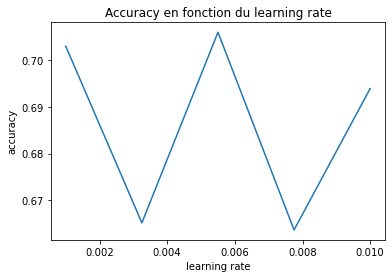

In [14]:
values = [ev.analyse_perfs(eps_acc)[0]  for eps_acc in eps_accuracies]
plt.title("Accuracy en fonction du learning rate")
plt.xlabel("learning rate")
plt.ylabel("accuracy")

plt.plot(epsilons, values)
plt.show()

In [15]:
 # Affichage du learning rate optimum.
eps_max = epsilons[np.argmax(values)]
print("Learning rate optimal:  %.4f" % eps_max)
print("Performance maximale: %.4f" % values[np.argmax(values)])

Learning rate optimal:  0.0055
Performance maximale: 0.7060


### Déterminer la valeur optimale du learning rate

Afin de déterminer la valeur optimale de learning rate qui maximise la performance de notre classifer_Perceptron, nous avons choisis une approche qui consiste en le calcul de la performance de notre classifier perceptron pour des valeurs différentes du learning rate et d'en choisir celle qui maximise cette dernière. Nous avons choisis une méthode de validation croisée.

En analysant le graphe représentant les performances du classifier Preceptron en fonction des différents valeurs du learning rate, on constate que la valeur du learning rate optimale est estimée à 0.0055 avec une performance de 70.6%.

Pour la suite, on choisis le classifer perc entraîné avec notre valeur optimale du learning rate.

In [16]:
##### Creation du classfier perceptron et son entrainement sur les données d'entrainement 
perc = cl.ClassifierMultiOAA(cl.ClassifierPerceptron(dim, eps_max))
perc.train(Xtrain, Ytrain)

# Calcul de la performance du classifier perceptron sur les données de tests
perc.accuracy(Xtest, Ytest)

0.8205645161290323

## KNN

In [17]:
np.random.seed(SEED)
k_accuracies = []

neighbors = np.arange(2, 8)

for k in neighbors:
    
    knn = cl.ClassifierMultiOAA(cl.ClassifierKNN(dim, k))
    accuracies = []
    
    for it in range(niter):
        _Xapp, _Yapp, _Xtest, _Ytest = ev.crossval(Xtrain, Ytrain, niter, it)
        knn.train(_Xapp, _Yapp)
        accuracies.append(knn.accuracy(_Xtest, _Ytest))
        
    k_accuracies.append(accuracies)

### Diagramme des performances résultants en fonctions des différents valeurs de k pour le classifier KNN

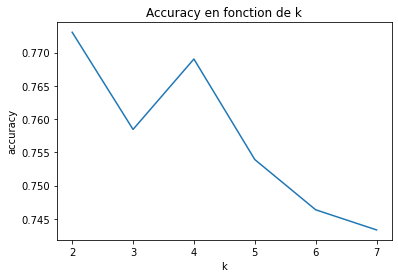

In [18]:
values = [ev.analyse_perfs(k_acc)[0] for k_acc in k_accuracies]

plt.title('Accuracy en fonction de k')
plt.xlabel('k')
plt.ylabel('accuracy')
plt.plot(neighbors, values)
plt.show()

In [20]:
 # Affichage du k optimum.
k_max = neighbors[np.argmax(values)]
print(f"Nombre de voisins k optimal: {k_max}")
print("Performance maximale: %.4f" % values[np.argmax(values)])

Nombre de voisins k optimal: 2
Performance maximale: 0.7731


### Détermination de la valeur optimale de k

Afin de déterminer la valeur optimale de k qui maximise la performance de notre classifer_KNN, nous avons choisis une approche qui consiste en le calcul de la performance de notre classifier pour des valeurs de k différentes et d'en choisir celle qui maximise cette dernière. Nous avons choisis une méthode de validation croisée.

En analysant le graphe représentant les performances du classifier KNN en fonction des différents valeurs de k, on constate que la valeur de k optimale est 2 avec une performance de 77.31%.

Pour la suite, on choisis le classifer knn entraîné avec notre valeur optimale de k.

In [23]:
knn = cl.ClassifierMultiOAA(cl.ClassifierKNN(dim, k_max))
knn.train(Xtrain, Ytrain)
knn.accuracy(Xtest, Ytest)

0.8770161290322581

## RandomForest

In [24]:
np.random.seed(SEED)
nb_att = 29

b_accuracies = []

bs = np.arange(2, 10)

for b in bs:
    
    frst = cl.ClassifierRandomForest(b, nb_att, 1e-2)
    accuracies = []
    
    for it in range(niter):
        _Xapp, _Yapp, _Xtest, _Ytest = ev.crossval(Xtrain, Ytrain, niter, it)
        frst.train((_Xapp, _Yapp))
        accuracies.append(frst.accuracy(_Xtest, _Ytest))
        
    b_accuracies.append(accuracies)

### Diagramme des performances résultants en fonctions des différents valeurs de b pour le classifier RandomForest

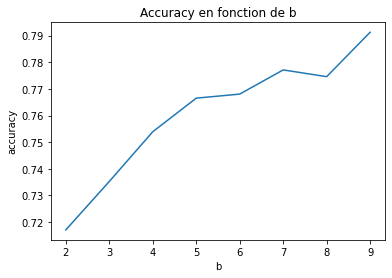

In [25]:
values = [ev.analyse_perfs(b_acc)[0] for b_acc in b_accuracies]

plt.title('Accuracy en fonction de b')
plt.xlabel('b')
plt.ylabel('accuracy')
plt.plot(bs, values)
plt.show()

In [26]:
# Affichage du b optimum.
b_max = bs[np.argmax(values)]
print("Performance maximale: %.4f" % values[np.argmax(values)])
b_max

Performance maximale: 0.7912


9

### Détermination de la valeur optimale de b

Afin de déterminer la valeur optimale de b qui maximise la performance de notre classifer_RandomForest, nous avons choisis une approche qui consiste en le calcul de la performance de notre classifier pour des valeurs de b différentes et d'en choisir celle qui maximise cette dernière. Nous avons choisis une méthode de validation croisée.

En analysant le graphe représentant les performances du classifier RandomForest en fonction des différents valeurs de b, on constate que la valeur de b optimale est 9 avec une performance de 79.12%.

Pour la suite, on choisis le classifer RandomForest entraîné avec notre valeur optimale de b.

In [165]:
frst = cl.ClassifierRandomForest(b_max, nb_att, 1e-2)
frst.train((Xtrain, Ytrain))
frst.accuracy(Xtest, Ytest)

0.8689516129032258

## Problème d'apprentissage non supervisé

Afin de classer les aliments au sein d'un même groupe selon différents clusters, on utilise l’algorithme des k moyennes qui rend l’ensemble des centroïdes et une matrice d’affectation des aliments.


In [166]:
data_cereal = data_synthese[data_synthese["Groupe d'aliment"] == "produits céréaliers"]
data_cereal = data_cereal.drop(columns=["Code AGB", "Code CIQUAL", "Groupe d'aliment", "Sous-groupe d'aliment", "Nom du Produit en Français", "LCI Name" ]) 

data_cereal = clust.normalisation(pd.get_dummies(data_cereal))

En utilisant l’index de Dunn et de Beni, on évalue par la suite les performances de notre clustering en fonction des différentes valeurs de k.


In [167]:
ks = [ k for k in range(2, 5) ]
iner = []
dunn = []
beni = []

for k in ks:
    centers, mat = clust.kmoyennes(k, data_cereal, 0.05, 100, verbose=False)
    iner.append(clust.inertie_globale(data_cereal, mat))
    dunn.append(clust.index_dunn(data_cereal, mat))
    beni.append(clust.index_XieBeni(data_cereal, centers, mat))

### Diagramme des performances résultants en fonctions des différents valeurs de k

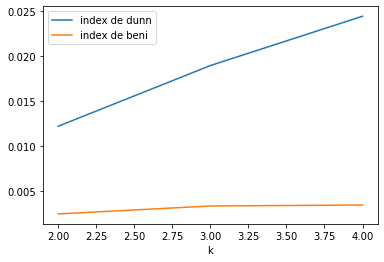

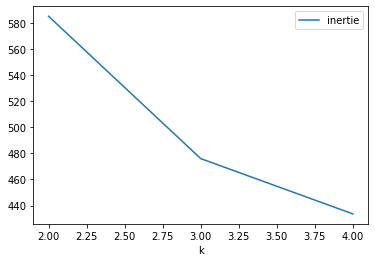

In [168]:
plt.xlabel("k")
plt.plot(ks, dunn, label="index de dunn")
plt.plot(ks, beni, label="index de beni")
plt.legend()
plt.show()

plt.xlabel("k")
plt.plot(ks, iner, label="inertie")
plt.legend()
plt.show()

In [183]:
# Affichage du k optimum.
dunn = np.array(dunn)
beni = np.array(beni)

i = np.argmin(dunn + beni)
k_max = ks[i]
k_max

2

### Détermination de la valeur optimale de k

En analysant le graphe des indexes de Dunn et de Beni ainsi que celui représentant les inerties globales de l'algorithme des k moyennes en fonction des différentes valeurs de k, on constate que la valeur de k optimale est 2.

In [ ]:
import warnings
warnings.filterwarnings('ignore')

centers, mat = clust.kmoyennes(k_max, data_cereal, 0.05, 100, verbose=False)

In [173]:
def reduce_dim(X):
    eig_val, eig_vec = np.linalg.eig(X.T @ X)
    sorted_i = eig_val.argsort()
    
    vec_a = eig_vec[:, sorted_i[-1]]
    vec_b = eig_vec[:, sorted_i[-2]]
    
    P_a = X @ vec_a
    P_b = X @ vec_b
    
    return P_a, P_b, vec_a, vec_b

In [176]:
import random as rd

def affiche_resultat(Base, Centres, Affect):
    clust = []
    
    for _, value in Affect.items():
        clust.append(pd.DataFrame([Base.iloc[elem]
                     for elem in value], columns=Base.columns))

    for i in range(len(Centres)):
        
        p_a, p_b, vec_a, vec_b = reduce_dim(clust[i])
        plt.scatter(p_a, p_b)
        
        plt.scatter(np.dot(Centres[i], vec_a), np.dot(
            Centres[i], vec_b), color='r', marker='x')
        
    plt.show()


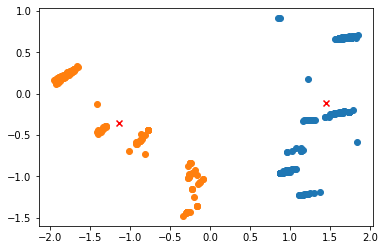

In [185]:
affiche_resultat(data_cereal, centers, mat)